Clustering 10 stream to 10 cluster with 10

In [7]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import re

In [9]:
file_names = [
    "[5-1-24].txt", "[5-2-24].txt", "[5-3-24].txt", "[5-4-24].txt", "[5-5-24].txt",
    "[5-6-24].txt", "[5-7-24].txt", "[5-9-24].txt", "[5-10-24].txt", "[5-11-24].txt"
]


# Define the path to your text files (ensure this path is correct)
path = ''  # update with your actual path

# Initialize an empty list to store parsed data
data = []

# Regex pattern to match the data format
pattern = r'\[(.*?)\] (.*?): (.*)'

# Iterate over each specified file
for file in file_names:
    full_path = path + file
    with open(full_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
        for line in lines:
            match = re.match(pattern, line)
            if match:
                date, user, message = match.groups()
                data.append([date, user, message])

# Create a DataFrame from the parsed data
combined_df = pd.DataFrame(data, columns=["date", "user", "message"])


In [10]:
combined_df.shape

(27552, 3)

In [11]:
# Convert the 'date' column to datetime
combined_df['date'] = pd.to_datetime(combined_df['date'], format='%Y-%m-%d %H:%M:%S %Z', errors='coerce')

# Add a new column 'time_in_number' that represents the date as the number of seconds since the Unix epoch
combined_df['time_in_number'] = combined_df['date'].apply(lambda x: x.timestamp() if not pd.isnull(x) else None)

In [12]:
combined_df.head(5)

,date,user,message,time_in_number
0,2024-05-01 15:04:02+00:00,Martin_Gales,hi there,1.714576e+09
1,2024-05-01 15:04:08+00:00,StreamElements,dorozea is now live! Streaming Just Chatting: ...,1.714576e+09
2,2024-05-01 15:04:22+00:00,Aloddin,yup,1.714576e+09
3,2024-05-01 15:04:27+00:00,utaBz,helloo,1.714576e+09
4,2024-05-01 15:04:28+00:00,Banties1g,Yooo,1.714576e+09


In [13]:
combined_df['time_delta'] = combined_df['time_in_number'] - combined_df['time_in_number'].min()

In [16]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(combined_df[['time_delta']])

kmeans = KMeans(n_clusters=10, random_state=42)  # Set random state for reproducibility
kmeans.fit(scaled_data)

KMeans(n_clusters=10, random_state=42)

In [18]:
combined_df['cluster'] = kmeans.labels_

In [19]:
import matplotlib.pyplot as plt

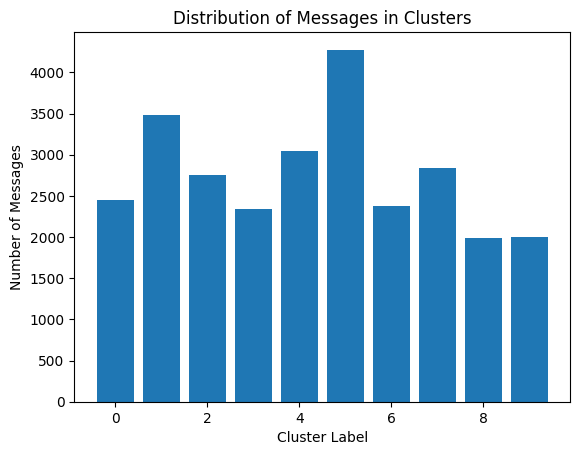

In [20]:
# Get the number of messages in each cluster
cluster_counts = combined_df['cluster'].value_counts().sort_values(ascending=False)

plt.bar(cluster_counts.index, cluster_counts.values)
plt.xlabel('Cluster Label')
plt.ylabel('Number of Messages')
plt.title('Distribution of Messages in Clusters')
plt.show()
